[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/corazzon/finance-data-analysis/blob/main/2.2.%20KRX%20%EC%A0%84%EC%B2%B4%20%EC%A2%85%EB%AA%A9%EB%B6%84%EC%84%9D-input.ipynb)

## 한국거래소(KRX) 전체 종목 분석
* Pandas cheat sheet 를 함께 보세요! : [Pandas_Cheat_Sheet.pdf](https://pandas.pydata.org/Pandas_Cheat_Sheet.pdf)

* FinanceDataReader를 통한 KRX 전체 종목 수집
    * to_csv("파일명", index=False) : csv 파일로 저장하기
    * read_csv("파일명") : csv 파일 불러오기
    
* Pandas를 통한 파일 저장과 불러오기
    * shape를 통한 행과 열의 수 보기
    * head, tail, sample 을 통한 일부 데이터 가져오기
    
* DataFrame의 info(), describe() 등을 통한 요약과 기술통계 값 구하기
    * info()
    * describe()
    * nunique()
    * index
    * columns
    * values
    
* Pandas의  DataFrame과 Series의 이해
    * Series : 1차원 벡터구조
    * DataFrame : 2차원 행렬구조
    
* 색인하기
    * [컬럼]
    * .loc[행]
    * .loc[행, 열]
    * .loc[조건식, 열]
    
* DataFrame의 데이터 타입 이해하기
    * 날짜 데이터의 변환
    
* DataFrame 다루기
    * 열(column) 인덱싱
    * 행(index) 인덱싱
    * 행, 열 인덱싱
    * 정렬하기 : sort_values 사용하기
    * 조건식 사용하기

* 빈도수 구하기
    * 한 개의 변수 : series.value_counts()
    * 두 개의 변수 : pd.crosstab()

* groupby 와 pivot_table
    * 다양한 연산식의 사용


## ⚠️ 주의할 점 ⚠️ 
* 강좌의 분석내용과 여러분의 실습 결과는 시점의 차이로 빈도수 등의 결과값이 다르게 나옵니다.



## 라이브러리 불러오기

In [65]:
# 데이터 분석을 위해 pandas, 시각화를 위해 seaborn 불러오기
import pandas as pd
import seaborn as sns
import numpy as np

## FinanceDataReader 로 수집한 전체 종목 불러오기

* 한국 주식 가격, 미국주식 가격, 지수, 환율, 암호화폐 가격, 종목 리스팅 등 금융 데이터 수집 라이브러리

* [FinanceDataReader 사용자 안내서 | FinanceData](https://financedata.github.io/posts/finance-data-reader-users-guide.html)
* https://pandas-datareader.readthedocs.io/en/latest/readers/index.html

<img src="https://pandas.pydata.org/docs/_images/02_io_readwrite.svg">

## <font color="red">종목명이 영문으로 표기될 때</font>

해당 수업은 실시간으로 한국거래소에서 FinanceDataReader 라는 라이브러리를 통해 데이터를 받아오고 있습니다.
아래 링크에 있는 라이브러리의 소스코드가 KRX 전체 종목을 가져오는 소스코드입니다.

[FinanceDataReader/listing.py at master · FinanceData/FinanceDataReader](https://github.com/FinanceData/FinanceDataReader/blob/master/krx/listing.py)

이 때, 전체 상장종목과 거래할 수 있는 ETF 등의 종목도 함께 가져오게 되는데,
FinanceDataReader 에서는 코스피, 코스닥, 코넥스 정보가 있는 엑셀파일과 금융상품 정보가 있는 JSON 데이터를 가져와서 병합하는 형태로 데이터를 제공하고 있습니다.
그런데 최근 JSON 데이터의 종목명이 영문으로 변경되어 제공되고 있음을 확인했습니다.
그래서 아래의 엑셀 데이터를 read_html 로 읽어오게 되면 한글로 된 종목명을 받아서 분석해 보실 수 있습니다.

In [ ]:
# # 종목명이 영문으로 표기 될 때 아래의 주석을 풀고 데이터를 받아서 분석해 보세요!
# url = 'http://kind.krx.co.kr/corpgeneral/corpList.do?method=download&searchType=13'
# df_listing = pd.read_html(url, header=0)[0]
# cols_ren = {'회사명':'Name', '종목코드':'Symbol', '업종':'Sector', '주요제품':'Industry', 
#                     '상장일':'ListingDate', '결산월':'SettleMonth',  '대표자명':'Representative', 
#                     '홈페이지':'HomePage', '지역':'Region', }
# df = df_listing.rename(columns = cols_ren)
# df['Symbol'] = df['Symbol'].apply(lambda x: '{:06d}'.format(x))
# df['ListingDate'] = pd.to_datetime(df['ListingDate'])
# df

In [5]:
# 이전 강좌에서 to_csv로 저장해둔 krx.csv 파일을 pd.read_csv 로 불러옵니다.
df = pd.read_csv('krx.csv')
df.shape

(8018, 10)

### 일부 데이터만 가져오기

{'회사명':'Name', '종목코드':'Symbol', '업종':'Sector', '주요제품':'Industry', 
                            '상장일':'ListingDate', '결산월':'SettleMonth',  '대표자명':'Representative', 
                            '홈페이지':'HomePage', '지역':'Region', }

In [4]:
# head 로 위에 있는 데이터 일부만 가져옵니다.
df.head()

,Symbol,Market,Name,Sector,Industry,ListingDate,SettleMonth,Representative,HomePage,Region
0,060310,KOSDAQ,3S,전자부품 제조업,반도체 웨이퍼 캐리어,2002-04-23,03월,김세완,http://www.3sref.com,서울특별시
1,095570,KOSPI,AJ네트웍스,산업용 기계 및 장비 임대업,"렌탈(파렛트, OA장비, 건설장비)",2015-08-21,12월,"박대현, 손삼달",http://www.ajnet.co.kr,서울특별시
2,006840,KOSPI,AK홀딩스,기타 금융업,지주사업,1999-08-11,12월,"채형석, 이석주(각자 대표이사)",http://www.aekyunggroup.co.kr,서울특별시
3,054620,KOSDAQ,APS홀딩스,기타 금융업,인터넷 트래픽 솔루션,2001-12-04,12월,정기로,http://www.apsholdings.co.kr,경기도
4,265520,KOSDAQ,AP시스템,특수 목적용 기계 제조업,디스플레이 제조 장비,2017-04-07,12월,김영주,http://www.apsystems.co.kr,경기도


In [6]:
# tail 로 아래 있는 데이터 일부만 가져옵니다.
df.tail(2)

,Symbol,Market,Name,Sector,Industry,ListingDate,SettleMonth,Representative,HomePage,Region
8016,429870,KOSPI,히어로즈 리츠이지스액티브,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8017,238490,KOSDAQ,힘스,특수 목적용 기계 제조업,"OLED Mask 인장기, OLED Mask 검사기 등",2017-07-20,12월,김주환,http://www.hims.co.kr,인천광역시


In [7]:
# sample을 사용하면 랜덤하게 ()안의 갯수만큼 가져옵니다. 
# ()안에 값을 써주지 않으면 한 개만 가져옵니다.
df.sample()

,Symbol,Market,Name,Sector,Industry,ListingDate,SettleMonth,Representative,HomePage,Region
7697,57HG31,KOSPI,한국HG31KOSPI200풋,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## 데이터 요약하기

In [8]:
# info 로 요약 데이터를 봅니다.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8018 entries, 0 to 8017
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Symbol          8018 non-null   object
 1   Market          8018 non-null   object
 2   Name            8018 non-null   object
 3   Sector          2499 non-null   object
 4   Industry        2482 non-null   object
 5   ListingDate     2499 non-null   object
 6   SettleMonth     2499 non-null   object
 7   Representative  2499 non-null   object
 8   HomePage        2347 non-null   object
 9   Region          2499 non-null   object
dtypes: object(10)
memory usage: 626.5+ KB


In [9]:
# describe 로 기술통계값을 봅니다.
df.describe()

,Symbol,Market,Name,Sector,Industry,ListingDate,SettleMonth,Representative,HomePage,Region
count,8018,8018,8018,2499,2482,2499,2499,2499,2347,2499
unique,8018,3,8018,161,2327,1858,8,2384,2326,22
top,060310,KOSPI,3S,소프트웨어 개발 및 공급업,기업인수합병,1996-07-03,12월,-,http://www.gccorp.com,서울특별시
freq,1,6320,1,151,28,8,2438,4,2,1022


In [12]:
# 중복을 제외한 unique 값의 갯수를 봅니다.
df.nunique()

Symbol            8018
Market               3
Name              8018
Sector             161
Industry          2327
ListingDate       1858
SettleMonth          8
Representative    2384
HomePage          2326
Region              22
dtype: int64

In [13]:
# index 값 보기
df.index

RangeIndex(start=0, stop=8018, step=1)

In [14]:
# 컬럼값 보기
df.columns

Index(['Symbol', 'Market', 'Name', 'Sector', 'Industry', 'ListingDate',
       'SettleMonth', 'Representative', 'HomePage', 'Region'],
      dtype='object')

In [15]:
# 값만 보기
df.values

array([['060310', 'KOSDAQ', '3S', ..., '김세완', 'http://www.3sref.com',
        '서울특별시'],
       ['095570', 'KOSPI', 'AJ네트웍스', ..., '박대현, 손삼달',
        'http://www.ajnet.co.kr', '서울특별시'],
       ['006840', 'KOSPI', 'AK홀딩스', ..., '채형석, 이석주(각자 대표이사)',
        'http://www.aekyunggroup.co.kr', '서울특별시'],
       ...,
       ['419890', 'KOSPI', '히어로즈 단기채권ESG액티브', ..., nan, nan, nan],
       ['429870', 'KOSPI', '히어로즈 리츠이지스액티브', ..., nan, nan, nan],
       ['238490', 'KOSDAQ', '힘스', ..., '김주환', 'http://www.hims.co.kr',
        '인천광역시']], dtype=object)

## 데이터 색인하기

### Series
<img src="https://pandas.pydata.org/docs/_images/01_table_series.svg">

In [16]:
# Name 컬럼 하나만 가져옵니다.
df["Name"]

0                    3S
1                AJ네트웍스
2                 AK홀딩스
3                APS홀딩스
4                 AP시스템
             ...       
8013               흥아해운
8014                 희림
8015    히어로즈 단기채권ESG액티브
8016      히어로즈 리츠이지스액티브
8017                 힘스
Name: Name, Length: 8018, dtype: object

In [17]:
# df["Name"] 의 type을 봅니다.
type(df["Name"])

pandas.core.series.Series

In [18]:
# 0번째 행만 가져옵니다. 행인덱스를 가져올때는 .loc를 사용합니다.
# loc는 위치(locate)를 의미합니다.
df.loc[0]

Symbol                          060310
Market                          KOSDAQ
Name                                3S
Sector                        전자부품 제조업
Industry                   반도체 웨이퍼 캐리어
ListingDate                 2002-04-23
SettleMonth                        03월
Representative                     김세완
HomePage          http://www.3sref.com
Region                           서울특별시
Name: 0, dtype: object

In [19]:
# df.loc[0] 의 type을 봅니다.
type(df.loc[0])

pandas.core.series.Series

### DataFrame
<img src="https://pandas.pydata.org/docs/_images/01_table_dataframe.svg">

In [20]:
# df 변수의 타입을 봅니다.
type(df)

pandas.core.frame.DataFrame

In [23]:
# 여러 컬럼을 지정할 때는 리스트 형태로 묶어주어야 합니다. 
# 2차원 행렬은 대괄호가 [] 2개가 있다는 것을 기억해 주세요. 
df[["Symbol", "Name"]].head()

,Symbol,Name
0,060310,3S
1,095570,AJ네트웍스
2,006840,AK홀딩스
3,054620,APS홀딩스
4,265520,AP시스템


In [24]:
# 여러 개의 행을 가져올 때도 [] 대괄호를 통해 리스트 형태로 묶어줍니다.
df.loc[[0, 3, 5, 7]]

,Symbol,Market,Name,Sector,Industry,ListingDate,SettleMonth,Representative,HomePage,Region
0,060310,KOSDAQ,3S,전자부품 제조업,반도체 웨이퍼 캐리어,2002-04-23,03월,김세완,http://www.3sref.com,서울특별시
3,054620,KOSDAQ,APS홀딩스,기타 금융업,인터넷 트래픽 솔루션,2001-12-04,12월,정기로,http://www.apsholdings.co.kr,경기도
5,211270,KOSDAQ,AP위성,통신 및 방송 장비 제조업,위성통신 단말기,2016-03-04,12월,류장수,http://www.apsi.co.kr,서울특별시
7,295820,KOSPI,ARIRANG 200동일가중,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [25]:
# 1개의 컬럼을 가져올 때도 대괄호[] 2개를 써서 리스트 형태로 묶어주게 되면 데이터프레임 형태로 반환됩니다.
# "Name" 을 데이터프레임으로 가져옵니다.
df[["Name"]]

,Name
0,3S
1,AJ네트웍스
2,AK홀딩스
3,APS홀딩스
4,AP시스템
...,...
8013,흥아해운
8014,희림
8015,히어로즈 단기채권ESG액티브
8016,히어로즈 리츠이지스액티브


In [26]:
type(df[['Name']])

pandas.core.frame.DataFrame

### loc를 통한 서브셋 가져오기
<img src="https://pandas.pydata.org/pandas-docs/stable/_images/03_subset_columns_rows.svg">

In [33]:
# 행과 열 함께 가져오기
# df[열][행]
df["Name"][0]

'3S'

In [32]:
# .loc[행, 열]
df.loc[0, "Name"]

'3S'

In [45]:
df.loc[0]["Name"]

'3S'

In [41]:
df[["Name", "Symbol"]].loc[[0, 1, 2]]

,Name,Symbol
0,3S,060310
1,AJ네트웍스,095570
2,AK홀딩스,006840


In [ ]:
# %timeit


In [ ]:
# %timeit


In [34]:
# 여러 개의 행과 하나의 컬럼 가져오기
# .loc[행, 열]
df.loc[[0, 1, 2], "Name"]

0        3S
1    AJ네트웍스
2     AK홀딩스
Name: Name, dtype: object

In [35]:
# 여러개의 행과 여러 개의 컬럼 가져오기
# .loc[행, 열]
df.loc[[0, 1, 2], ["Name", "Symbol"]]

,Name,Symbol
0,3S,060310
1,AJ네트웍스,095570
2,AK홀딩스,006840


### Boolean Indexing
* 결과값이 True, False bool 형태로 반환되기 때문에 boolean indexing 이라고 부릅니다.
* boolean indexing 을 사용해 특정 조건식을 만족하는 데이터를 서브셋으로 가져옵니다.

<img src="https://pandas.pydata.org/docs/_images/03_subset_rows.svg">

In [43]:
# 카카오를 찾습니다.
df[df["Name"] == "카카오"]

,Symbol,Market,Name,Sector,Industry,ListingDate,SettleMonth,Representative,HomePage,Region
5621,035720,KOSPI,카카오,"자료처리, 호스팅, 포털 및 기타 인터넷 정보매개 서비스업",인터넷 서비스(인터넷 광고),2017-07-10,12월,남궁훈,http://www.kakaocorp.com,제주특별자치도


<img src="https://pandas.pydata.org/pandas-docs/stable/_images/03_subset_columns_rows.svg">

In [ ]:
# and => &
# or => |
True and False

In [46]:
# 서울특별시에 소재지를 두고 있는 KOSPI 종목의 종목명과 심볼을 가져옵니다.
# .loc[행, 열]
# .loc[조건식, 열]
df.loc[(df["Region"] == "서울특별시") & (df["Market"] == "KOSPI"), ["Symbol", "Name"]]


,Symbol,Name
1,095570,AJ네트웍스
2,006840,AK홀딩스
53,027410,BGF
54,282330,BGF리테일
57,001460,BYC
...,...,...
7988,081660,휠라홀딩스
7999,079980,휴비스
8002,005010,휴스틸
8010,000540,흥국화재


In [51]:
df[(df["Region"] == "서울특별시") & (df["Market"] == "KOSPI")][["Symbol", "Name"]]

,Symbol,Name
1,095570,AJ네트웍스
2,006840,AK홀딩스
53,027410,BGF
54,282330,BGF리테일
57,001460,BYC
...,...,...
7988,081660,휠라홀딩스
7999,079980,휴비스
8002,005010,휴스틸
8010,000540,흥국화재


## 파생변수 만들기

In [54]:
# pd.to_datetime 을 통해 데이터의 타입을 변환합니다.
df["ListingDate"] = pd.to_datetime(df["ListingDate"])

In [56]:
# ListingYear 파생변수 만들기
df["ListingYear"] = df["ListingDate"].dt.year

In [61]:
ts = df["ListingDate"].loc[0]
ts

Timestamp('2002-04-23 00:00:00')

In [63]:
type(df["ListingDate"])

pandas.core.series.Series

In [66]:
# nan은 not a number의 약자로 결측치를 의미합니다.
type(np.nan)

float

In [67]:
df[["ListingDate", "ListingYear"]]

,ListingDate,ListingYear
0,2002-04-23,2002.0
1,2015-08-21,2015.0
2,1999-08-11,1999.0
3,2001-12-04,2001.0
4,2017-04-07,2017.0
...,...,...
8013,1976-06-29,1976.0
8014,2000-02-03,2000.0
8015,NaT,NaN
8016,NaT,NaN


In [68]:
df[["ListingDate", "ListingYear"]].dtypes

ListingDate    datetime64[ns]
ListingYear           float64
dtype: object

## 데이터 시각화 툴 소개

### matplotlib
* [Anatomy of a figure — Matplotlib documentation](https://matplotlib.org/3.1.1/gallery/showcase/anatomy.html)

### seaborn
* [seaborn: statistical data visualization — seaborn documentation](https://seaborn.pydata.org/index.html)

### pandas
* [Visualization — pandas documentation](https://pandas.pydata.org/pandas-docs/stable/user_guide/visualization.html)

## 데이터 시각화를 위한 폰트설정

In [69]:
def get_font_family():
    """
    시스템 환경에 따른 기본 폰트명을 반환하는 함수
    """
    import platform
    system_name = platform.system()
    # colab 사용자는 system_name이 'Linux'로 확인

    if system_name == "Darwin" :
        font_family = "AppleGothic"
    elif system_name == "Windows":
        font_family = "Malgun Gothic"
    else:
        !apt-get install fonts-nanum -qq  > /dev/null
        !fc-cache -fv

        import matplotlib as mpl
        mpl.font_manager._rebuild()
        findfont = mpl.font_manager.fontManager.findfont
        mpl.font_manager.findfont = findfont
        mpl.backends.backend_agg.findfont = findfont
        
        font_family = "NanumBarunGothic"
    return font_family

In [70]:
# 위에서 만든 함수를 통해 시스템 폰트를 불러옵니다.
get_font_family()

'Malgun Gothic'

In [71]:
# 시각화를 위한 폰트설정
# 위에서 만든 함수를 통해 시스템 폰트를 불러와서 font_family 라는 변수에 할당합니다.
import matplotlib.pyplot as plt

# 폰트설정
font_family = get_font_family()
plt.rc("font", family=font_family)
# 마이너스폰트 설정
plt.rc("axes", unicode_minus=False)

# ggplot으로 그래프 스타일 설정
plt.style.use("ggplot")

# 그래프에 retina display 적용
from IPython.display import set_matplotlib_formats
set_matplotlib_formats("retina")

C:\Users\HANON\AppData\Local\Continuum\miniconda3\envs\DA\lib\site-packages\ipykernel_launcher.py:16: DeprecationWarning: `set_matplotlib_formats` is deprecated since IPython 7.23, directly use `matplotlib_inline.backend_inline.set_matplotlib_formats()`
  app.launch_new_instance()


### 폰트 설정 확인하기

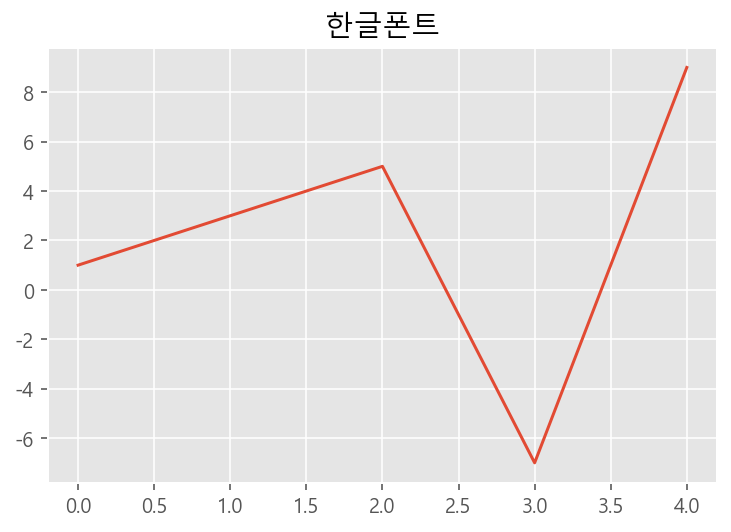

In [72]:
# 한글폰트 확인하기
pd.Series([1, 3, 5, -7, 9]).plot(title="한글폰트")

## 한 개의 변수 빈도수 구하고 시각화 하기
* Keyword

    * Series.value_counts()
    * Series.value_counts().plot()
    * Series.value_counts().plot.bar()
    * Series.value_counts().plot.barh()
    * sns.countplot()

### Market

* KOSPI (Korea Composite Stock Price Index) 
    * 우리나라의 종합주가지수(KOSPI)는 증권거래소가 1964.1.4일을 기준시점으로 다우존스식 주가평균을 지수화한 수정주가 평균지수를 산출, 발표하기 시작하였다. 다우존스식 주가지수는 주가지수를 구성하는 상장종목 중 일부 우량주만을 선정하여 산출하는 방식이다. 시가총액식 주가지수는 일정시점의 시가총액과 현재시점의 시가총액을 대비, 현재의 주가수준을 판단하는 방식이다. 즉, 지난 1980년 1월 4일 기준 상장종목 전체의 시가총액을 100으로 보고 현재 상장종목들의 시가총액이 어느 수준에 놓여 있는지를 보여주는 시스템이다.
    * 종합주가지수 = (비교시점의 시가총액 ÷ 기준시점의 시가총액) × 100
    * 출처 : [네이버 지식백과] 종합주가지수 (시사상식사전, pmg 지식엔진연구소) https://terms.naver.com/entry.nhn?docId=72147&cid=43667&categoryId=43667


* KOSDAQ (Korea Securities Dealers Automated Quotation) 
    * 미국의 나스닥(NASDAQ)을 한국식으로 합성한 용어로 1996년 7월 1일 증권업협회와 증권사들이 설립한 코스닥증권(주)에 의하여 개설되었다. 코스닥의 개장으로 단순히 증권거래소 상장을 위한 예비적 단계였던 장외시장이 미국의 나스닥(NASDAQ)과 같이 자금조달 및 투자시장으로 독립적인 역할을 수행하게 되었다. 이후 2005년 1월 유가증권시장, 코스닥시장, 선물시장이 증권선물거래소(현 한국거래소)로 통합됨에 따라 코스닥시장도 거래소가 개설한 정규시장으로 편입되었다. 코스닥은 유가증권시장에 비해 진입요건이 상대적으로 덜 까다롭기 때문에 주로 중소벤처기업들이 상장되어 있다.
    * 출처 : [네이버 지식백과] KOSDAQ (매일경제, 매경닷컴) https://terms.naver.com/entry.nhn?docId=18639&cid=43659&categoryId=43659


* KONEX(Korea New Exchange) : 
    * 일정 요건을 갖춘 비상장 기업에 문호를 개방하기 위해 개설하는 유가증권시장, 코스닥시장에 이은 제3의 주식시장을 일컫는다. 코넥스시장은 우수한 기술력을 보유하고 있음에도 불구하고, 짧은 경력 등을 이유로 자금 조달에 어려움을 겪는 초기 중소기업과 벤처기업이 자금을 원활하게 조달할 수 있도록 하기 위해 설립된 자본시장으로, 2013년 7월 1일 개장되었다. 
    * 출처 : [네이버 지식백과] 코넥스 (시사상식사전, pmg 지식엔진연구소) https://terms.naver.com/entry.nhn?docId=1006691&cid=43667&categoryId=43667

In [111]:
df["Market"].value_counts()

KOSPI     6320
KOSDAQ    1573
KONEX      125
Name: Market, dtype: int64

In [74]:
# Market column에 어떤 데이터들이 있는지 unique로 확인합니다.
df["Market"].unique()

array(['KOSDAQ', 'KOSPI', 'KONEX'], dtype=object)

In [75]:
# value_counts()로 빈도수를 구합니다.
df["Market"].value_counts()

KOSPI     6320
KOSDAQ    1573
KONEX      125
Name: Market, dtype: int64

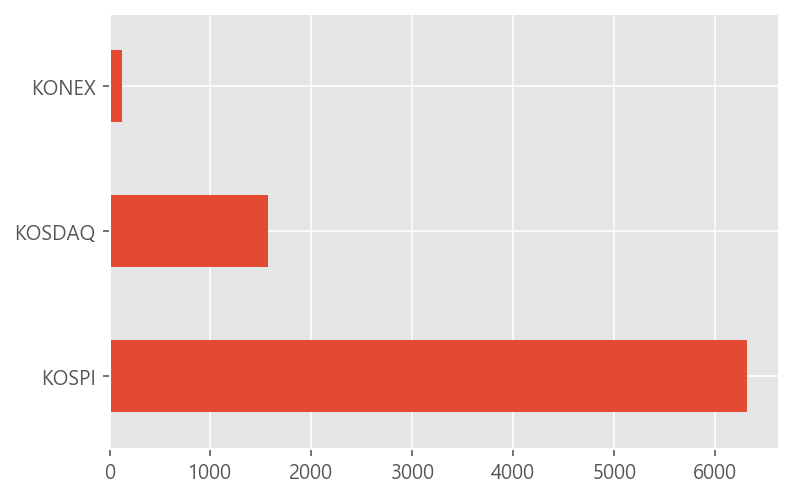

In [77]:
# 빈도수를 시각화 합니다.
df["Market"].value_counts().plot.barh()

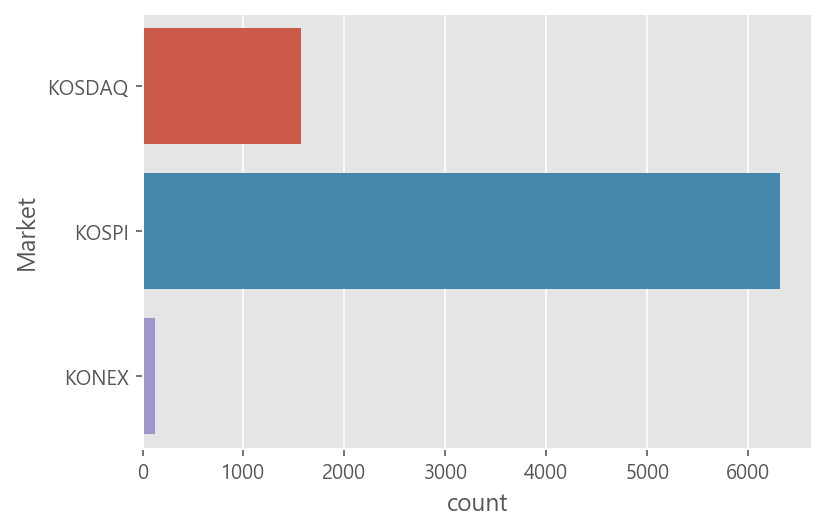

In [78]:
# Seaborn countplot 활용하여 빈도수를 표현합니다.
sns.countplot(data=df, y="Market")

### Sector

In [79]:
# 섹터의 빈도수를 구합니다.
# 상위 30개 섹터의 빈도수를 sector_count_top 변수에 할당합니다.
sector_count_top = df["Sector"].value_counts().head(30)
sector_count_top

소프트웨어 개발 및 공급업                           151
특수 목적용 기계 제조업                            147
전자부품 제조업                                 128
의약품 제조업                                   96
자동차 신품 부품 제조업                             94
기타 금융업                                    92
기타 화학제품 제조업                               91
금융 지원 서비스업                                76
통신 및 방송 장비 제조업                            71
반도체 제조업                                   60
자연과학 및 공학 연구개발업                           59
1차 철강 제조업                                 58
의료용 기기 제조업                                56
플라스틱제품 제조업                                46
일반 목적용 기계 제조업                             45
기초 화학물질 제조업                               42
기초 의약물질 및 생물학적 제제 제조업                     40
컴퓨터 프로그래밍, 시스템 통합 및 관리업                   40
기타 전문 도매업                                 38
전동기, 발전기 및 전기 변환 · 공급 · 제어 장치 제조업         36
기타 식품 제조업                                 34
영화, 비디오물, 방송프로그램 제작 및 배급업                 31
의료용품 및 기타 

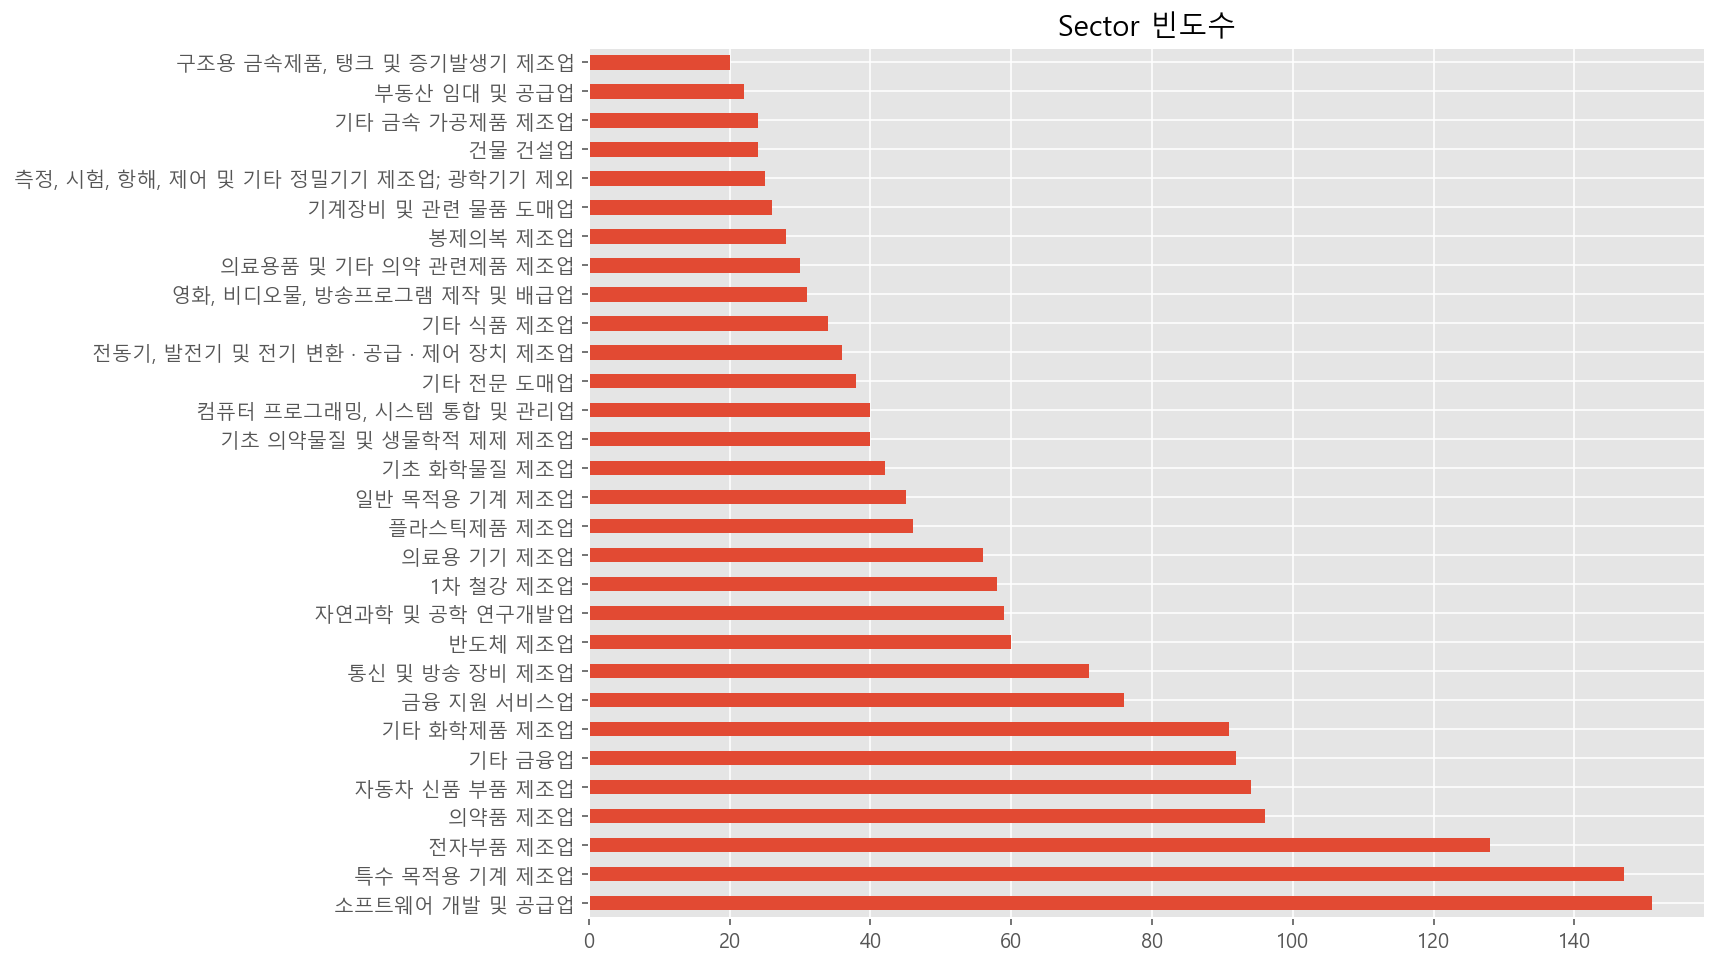

In [82]:
df_sector_30 = sector_count_top
df_sector_30.plot.barh(figsize=(10, 8), title="Sector 빈도수")

In [84]:
# 상위 30개 섹터에 해당하는 상장사 목록
df[df["Sector"].isin(sector_count_top.index)]

,Symbol,Market,Name,Sector,Industry,ListingDate,SettleMonth,Representative,HomePage,Region,ListingYear
0,060310,KOSDAQ,3S,전자부품 제조업,반도체 웨이퍼 캐리어,2002-04-23,03월,김세완,http://www.3sref.com,서울특별시,2002.0
2,006840,KOSPI,AK홀딩스,기타 금융업,지주사업,1999-08-11,12월,"채형석, 이석주(각자 대표이사)",http://www.aekyunggroup.co.kr,서울특별시,1999.0
3,054620,KOSDAQ,APS홀딩스,기타 금융업,인터넷 트래픽 솔루션,2001-12-04,12월,정기로,http://www.apsholdings.co.kr,경기도,2001.0
4,265520,KOSDAQ,AP시스템,특수 목적용 기계 제조업,디스플레이 제조 장비,2017-04-07,12월,김영주,http://www.apsystems.co.kr,경기도,2017.0
5,211270,KOSDAQ,AP위성,통신 및 방송 장비 제조업,위성통신 단말기,2016-03-04,12월,류장수,http://www.apsi.co.kr,서울특별시,2016.0
...,...,...,...,...,...,...,...,...,...,...,...
8005,084110,KOSDAQ,휴온스글로벌,의약품 제조업,의약품제조업,2006-12-19,12월,송수영,http://www.huonsglobal.com,경기도,2006.0
8006,145020,KOSDAQ,휴젤,기초 의약물질 및 생물학적 제제 제조업,"보툴리눔톡신, 필러",2015-12-24,12월,손지훈,http://www.hugel.co.kr,강원도,2015.0
8007,024060,KOSDAQ,흥구석유,기타 전문 도매업,휘발유등,1994-12-07,12월,김상우,NaN,대구광역시,1994.0
8008,010240,KOSDAQ,흥국,특수 목적용 기계 제조업,굴삭기 Roller 및 형단조품,2009-05-12,12월,류명준,http://www.heungkuk.co.kr,충청남도,2009.0


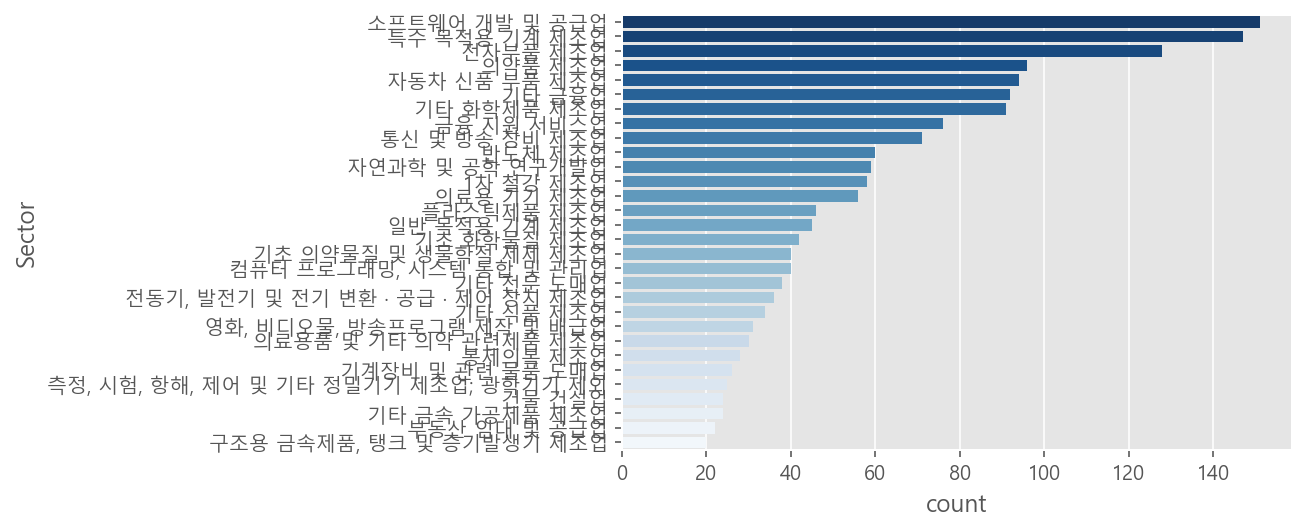

In [87]:
# Seaborn countplot 활용하여 빈도수를 표현합니다.
sns.countplot(data=df[df["Sector"].isin(sector_count_top.index)],
             y="Sector", palette="Blues_r",
             order=sector_count_top.index)

In [88]:
print(plt.colormaps())

['Accent', 'Accent_r', 'Blues', 'Blues_r', 'BrBG', 'BrBG_r', 'BuGn', 'BuGn_r', 'BuPu', 'BuPu_r', 'CMRmap', 'CMRmap_r', 'Dark2', 'Dark2_r', 'GnBu', 'GnBu_r', 'Greens', 'Greens_r', 'Greys', 'Greys_r', 'OrRd', 'OrRd_r', 'Oranges', 'Oranges_r', 'PRGn', 'PRGn_r', 'Paired', 'Paired_r', 'Pastel1', 'Pastel1_r', 'Pastel2', 'Pastel2_r', 'PiYG', 'PiYG_r', 'PuBu', 'PuBuGn', 'PuBuGn_r', 'PuBu_r', 'PuOr', 'PuOr_r', 'PuRd', 'PuRd_r', 'Purples', 'Purples_r', 'RdBu', 'RdBu_r', 'RdGy', 'RdGy_r', 'RdPu', 'RdPu_r', 'RdYlBu', 'RdYlBu_r', 'RdYlGn', 'RdYlGn_r', 'Reds', 'Reds_r', 'Set1', 'Set1_r', 'Set2', 'Set2_r', 'Set3', 'Set3_r', 'Spectral', 'Spectral_r', 'Wistia', 'Wistia_r', 'YlGn', 'YlGnBu', 'YlGnBu_r', 'YlGn_r', 'YlOrBr', 'YlOrBr_r', 'YlOrRd', 'YlOrRd_r', 'afmhot', 'afmhot_r', 'autumn', 'autumn_r', 'binary', 'binary_r', 'bone', 'bone_r', 'brg', 'brg_r', 'bwr', 'bwr_r', 'cividis', 'cividis_r', 'cool', 'cool_r', 'coolwarm', 'coolwarm_r', 'copper', 'copper_r', 'cubehelix', 'cubehelix_r', 'flag', 'flag_r',

In [89]:
# 빈도수가 가장 많은 데이터 색인하기
df[df["Sector"] == "소프트웨어 개발 및 공급업"]

,Symbol,Market,Name,Sector,Industry,ListingDate,SettleMonth,Representative,HomePage,Region,ListingYear
111,214270,KOSDAQ,FSN,소프트웨어 개발 및 공급업,카울리,2015-03-25,12월,"이상석, 서정교 (각자 대표이사)",http://fsn.co.kr,서울특별시,2015.0
1320,046440,KOSDAQ,KG모빌리언스,소프트웨어 개발 및 공급업,유무선전화결제서비스,2004-12-14,12월,고규영,http://www.mobilians.co.kr,서울특별시,2004.0
1323,035600,KOSDAQ,KG이니시스,소프트웨어 개발 및 공급업,전자지불서비스,2002-11-22,12월,유승용,http://www.inicis.com,서울특별시,2002.0
1645,181710,KOSPI,NHN,소프트웨어 개발 및 공급업,한게임,2013-08-29,12월,정우진,http://www.nhn.com,경기도,2013.0
1646,104200,KOSDAQ,NHN벅스,소프트웨어 개발 및 공급업,"디지털음원유통, 온라인음악서비스",2009-10-06,12월,왕문주,http://www.bugs.co.kr,경기도,2009.0
...,...,...,...,...,...,...,...,...,...,...,...
7880,054920,KOSDAQ,한컴위드,소프트웨어 개발 및 공급업,전자상거래 보안 솔루션,2001-11-01,12월,"김현수, 송상엽(각자대표)",http://www.hsecure.co.kr,경기도,2001.0
7907,220180,KOSDAQ,핸디소프트,소프트웨어 개발 및 공급업,"EKP, BPM, 네트워크장비",2016-11-24,12월,이준희,http://www.handysoft.co.kr,경기도,2016.0
7935,307950,KOSPI,현대오토에버,소프트웨어 개발 및 공급업,"전산실운영, 시스템구축, 전산장비 납품, SOC/건축 사업",2019-03-28,12월,서정식,http://www.hyundai-autoever.com,서울특별시,2019.0
7941,090850,KOSDAQ,현대이지웰,소프트웨어 개발 및 공급업,선택적복리후생서비스,2013-12-27,12월,장영순,http://www.hyundaiezwel.com,서울특별시,2013.0


### Industry

In [90]:
# Industry 의 빈도수를 구합니다.
industry_top30 = df["Industry"].value_counts().head(30)
industry_top30

기업인수합병              28
지주회사                20
지주사업                 9
모바일게임                7
화장품                  7
기업인수 및 합병            7
기업 인수 및 합병           5
금융 지원 서비스            5
부동산투자                4
합병                   4
-                    4
벤처캐피탈                3
자동차부품                3
금융 지원 서비스업           3
건강기능식품               3
금융지주회사               3
셋톱박스                 3
증권업                  3
금융지원 서비스             3
의약품                  3
기업인수                 3
도급공사                 3
광고대행                 2
화장품 용기               2
유가증권 매매,중개,대리,인수     2
생명보험                 2
부동산 임대업              2
부동산 투자 및 관리          2
주정                   2
전력변환장치               2
Name: Industry, dtype: int64

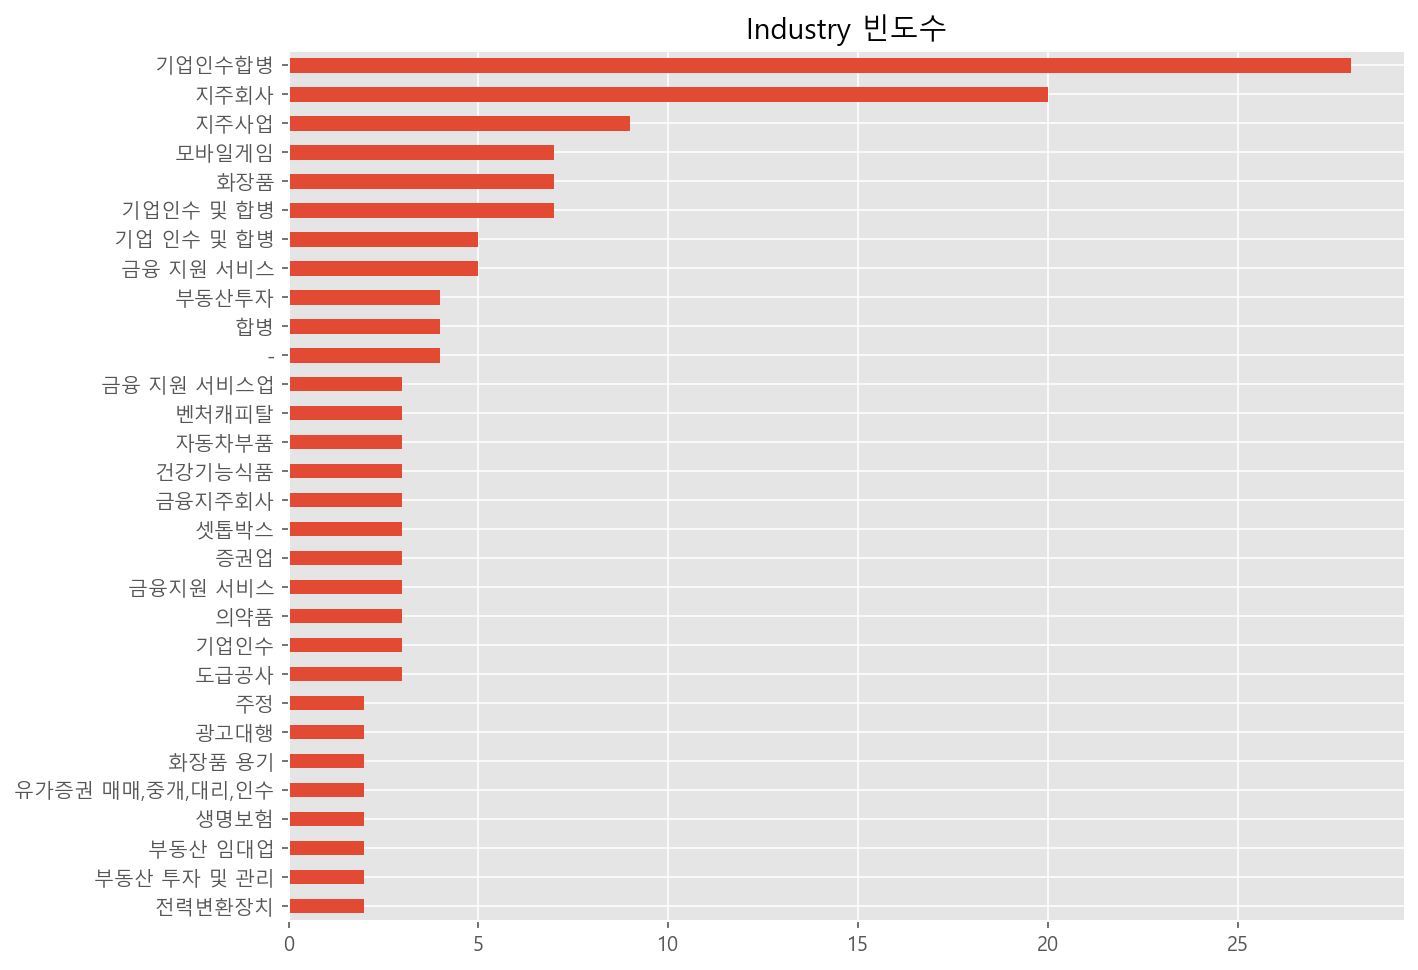

In [98]:
industry_top30.sort_values(ascending=True).plot.barh(figsize=(10, 8), title="Industry 빈도수")

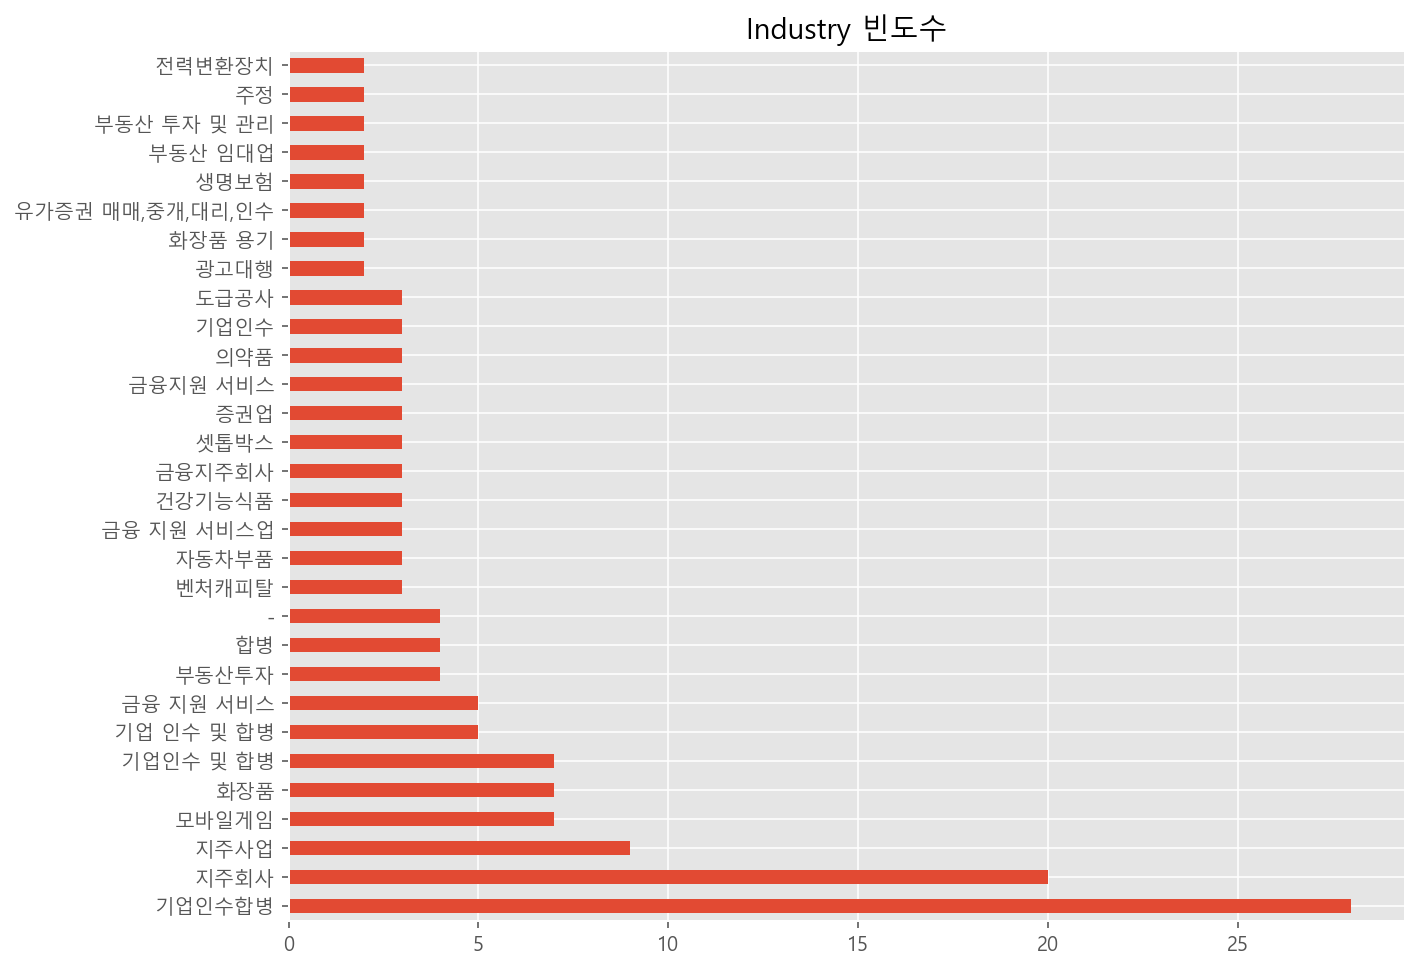

In [91]:
# Industry 빈도수를 pandas 의 plot 기능을 사용해 시각화 합니다.
industry_top30.plot.barh(figsize=(10, 8), title="Industry 빈도수")

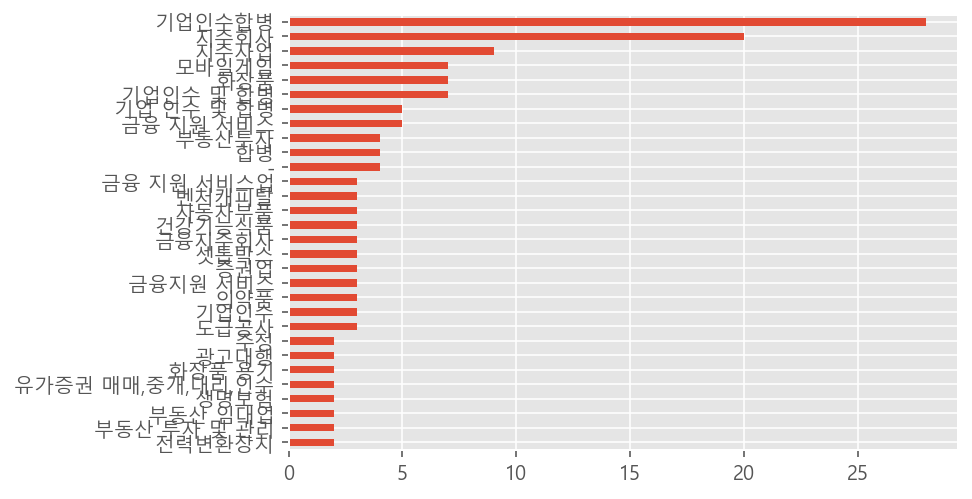

In [99]:
# sort_values 기능을 사용해 반대로 정렬해서 표시합니다.
df["Industry"].value_counts().head(30).sort_values().plot.barh()

In [100]:
df[df["Industry"].isin(industry_top30.index)]

,Symbol,Market,Name,Sector,Industry,ListingDate,SettleMonth,Representative,HomePage,Region,ListingYear
2,006840,KOSPI,AK홀딩스,기타 금융업,지주사업,1999-08-11,12월,"채형석, 이석주(각자 대표이사)",http://www.aekyunggroup.co.kr,서울특별시,1999.0
53,027410,KOSPI,BGF,기타 금융업,지주회사,2014-05-19,12월,홍정국,http://www.bgf.co.kr,서울특별시,2014.0
56,138930,KOSPI,BNK금융지주,기타 금융업,금융지주회사,2011-03-30,12월,김지완,http://www.bnkfg.com,부산광역시,2011.0
60,001040,KOSPI,CJ,기타 금융업,지주회사,1973-06-29,12월,"손경식, 김홍기",http://www.cj.net,서울특별시,1973.0
72,058820,KOSDAQ,CMG제약,의약품 제조업,의약품,2001-08-31,12월,이주형,http://www.cmgpharma.co.kr,서울특별시,2001.0
...,...,...,...,...,...,...,...,...,...,...,...
7973,126640,KOSDAQ,화신정공,자동차 신품 부품 제조업,자동차부품,2010-08-31,12월,정 서 진,http://hsp.hwashin.co.kr,경상북도,2010.0
7983,298040,KOSPI,효성중공업,"전동기, 발전기 및 전기 변환 · 공급 · 제어 장치 제조업",-,2018-07-13,12월,양동기 / 요코타 타케시,http://www.hyosungheavyindustries.com,서울특별시,2018.0
7986,298000,KOSPI,효성화학,기초 화학물질 제조업,-,2018-07-13,12월,이건종,http://www.hyosungchemical.com,서울특별시,2018.0
7991,353190,KOSDAQ,휴럼,기타 식품 제조업,금융지원 서비스,2020-06-17,12월,김진석,NaN,서울특별시,2020.0


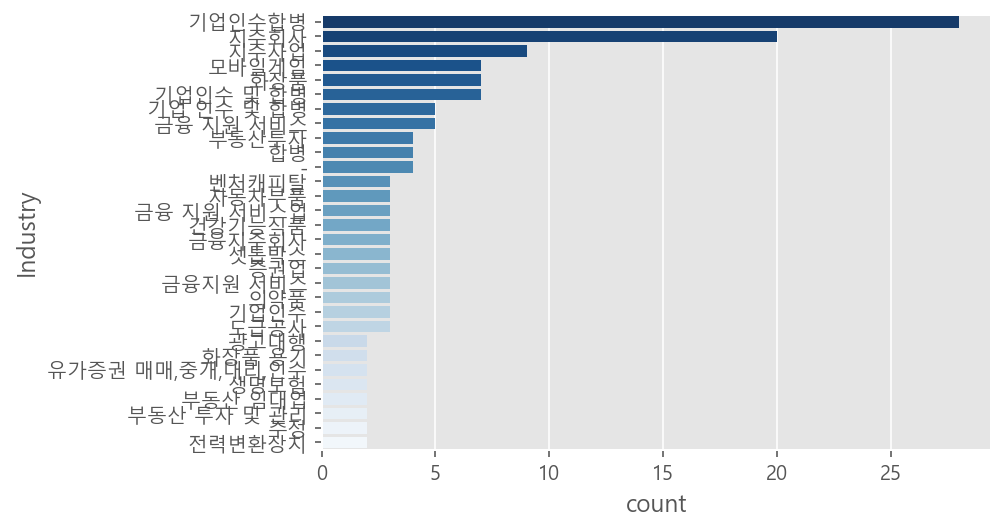

In [104]:
# seaborn
sns.countplot(data=df[df["Industry"].isin(industry_top30.index)],
              y="Industry", palette="Blues_r",
             order=industry_top30.index)

### Region 

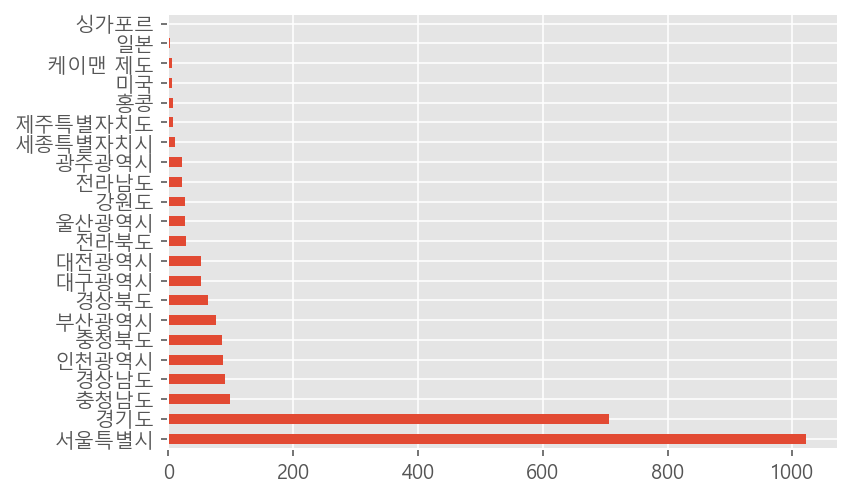

In [106]:
# Region 의 빈도수를 구합니다.
# value_counts()통해 지역별 상장회사의 빈도수를 봅니다.
df["Region"].value_counts().plot.barh()

In [107]:
# df["Region"]
df["Region"].value_counts().index

Index(['서울특별시', '경기도', '충청남도', '경상남도', '인천광역시', '충청북도', '부산광역시', '경상북도',
       '대구광역시', '대전광역시', '전라북도', '울산광역시', '강원도', '전라남도', '광주광역시', '세종특별자치시',
       '제주특별자치도', '홍콩', '미국', '케이맨 제도', '일본', '싱가포르'],
      dtype='object')

Text(0.5, 1.0, '소재지별 종목 수')

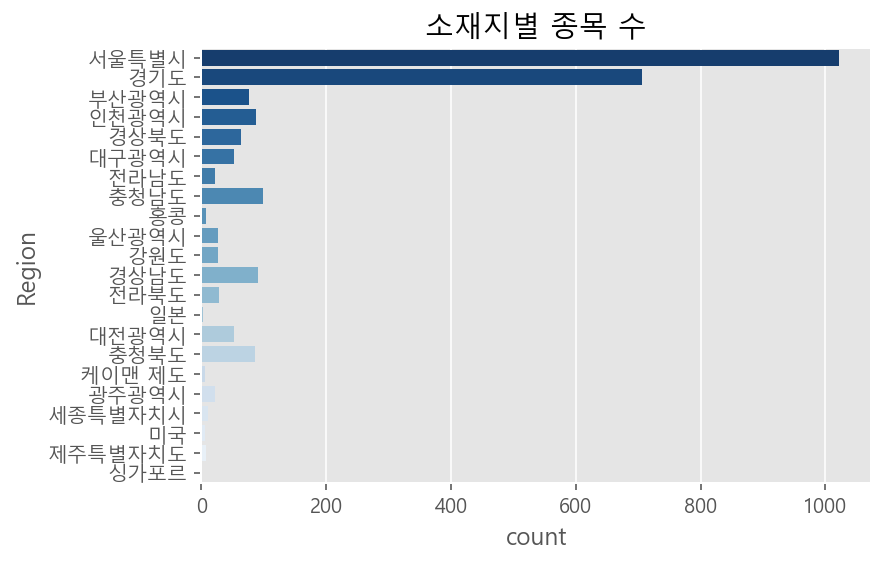

In [108]:
# Region 의 빈도수를 seaborn 의 countplot 으로 그립니다.
sns.countplot(data=df, y="Region",
             palette="Blues_r").set_title("소재지별 종목 수")

Text(0.5, 1.0, '소재지별 종목 수')

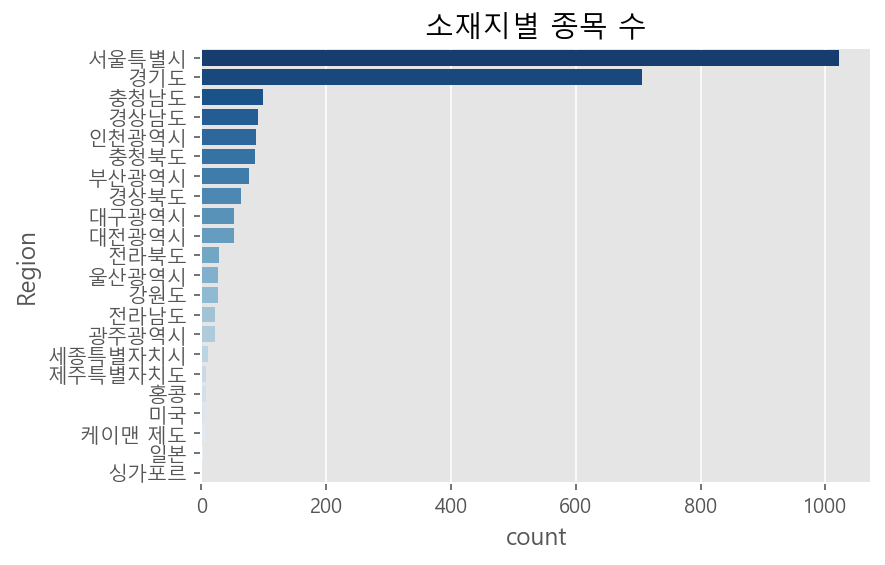

In [109]:
# order 기능을 통해 빈도수를 정렬합니다.
# df["Region"].value_counts().index 로 Region 의 순서를 가져와서 지정합니다.
sns.countplot(data=df, y="Region",
            palette="Blues_r",
             order=df["Region"].value_counts().index).set_title("소재지별 종목 수")

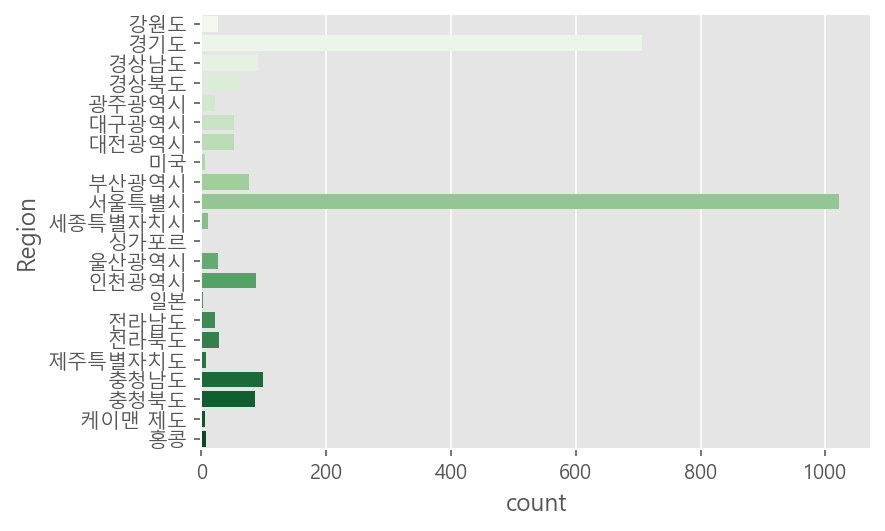

In [115]:
# Region 을 기준으로 정렬합니다.
df_region = df.sort_values(by="Region")
sns.countplot(data=df_region,
             palette="Greens", 
             y = "Region")

## 두 개의 변수 빈도수 구하고 시각화 하기
* crosstab 으로 빈도수 구하기
* seaborn의 countplot 으로 빈도수 시각화
* pandas의 plot 기능으로 시각화
    * lineplot : 연속된 데이터(숫자, 기간)
    * barplot : 비연속 데이터(범주형)
    * hist : 연속된 수치 데이터의 범주화

### 지역별 상장 시장 종목 빈도수 구하기
* pd.crosstab 을 통한 2개의 변수에 대한 빈도수 구하기

In [116]:
# pd.crosstab 을 통한 2개의 변수에 대한 빈도수 구하기
# Market 과 Region 으로 빈도수 구하기
pd.crosstab(df["Market"], df["Region"])

Region,강원도,경기도,경상남도,경상북도,광주광역시,대구광역시,대전광역시,미국,부산광역시,서울특별시,...,울산광역시,인천광역시,일본,전라남도,전라북도,제주특별자치도,충청남도,충청북도,케이맨 제도,홍콩
Market,,,,,,,,,,,,,,,,,,,,,
KONEX,5,32,1,4,4,1,7,0,2,47,...,0,3,0,3,1,1,4,9,0,0
KOSDAQ,17,527,47,41,9,31,38,6,39,550,...,9,60,2,12,16,2,69,61,4,8
KOSPI,4,147,42,19,9,21,7,0,35,425,...,17,24,0,7,12,5,25,16,1,0


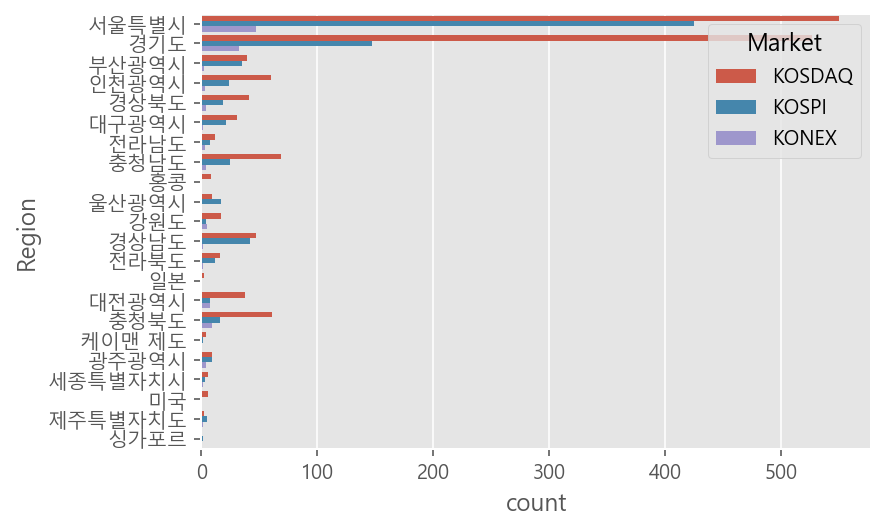

In [118]:
# countplot : Market 과 Region 으로 빈도수 시각화 하기
sns.countplot(data=df, y="Region", hue="Market")

In [119]:
df.columns

Index(['Symbol', 'Market', 'Name', 'Sector', 'Industry', 'ListingDate',
       'SettleMonth', 'Representative', 'HomePage', 'Region', 'ListingYear'],
      dtype='object')

### 연도별 상장 종목 빈도수 분석

In [122]:
# Market, ListingYear 빈도수 구하기
df_market_year = pd.crosstab(df["Market"], df["ListingYear"])
df_market_year

ListingYear,1956.0,1962.0,1964.0,1966.0,1968.0,1969.0,1970.0,1971.0,1972.0,1973.0,...,2013.0,2014.0,2015.0,2016.0,2017.0,2018.0,2019.0,2020.0,2021.0,2022.0
Market,,,,,,,,,,,,,,,,,,,,,
KONEX,0,0,0,0,0,0,0,0,0,0,...,11,10,24,21,14,13,13,11,7,1
KOSDAQ,0,0,0,0,0,0,0,0,0,0,...,35,58,89,60,68,85,89,86,100,34
KOSPI,5,1,1,1,6,5,4,1,3,22,...,10,9,17,18,20,19,15,14,27,2


### seaborn을 통한 빈도수 시각화

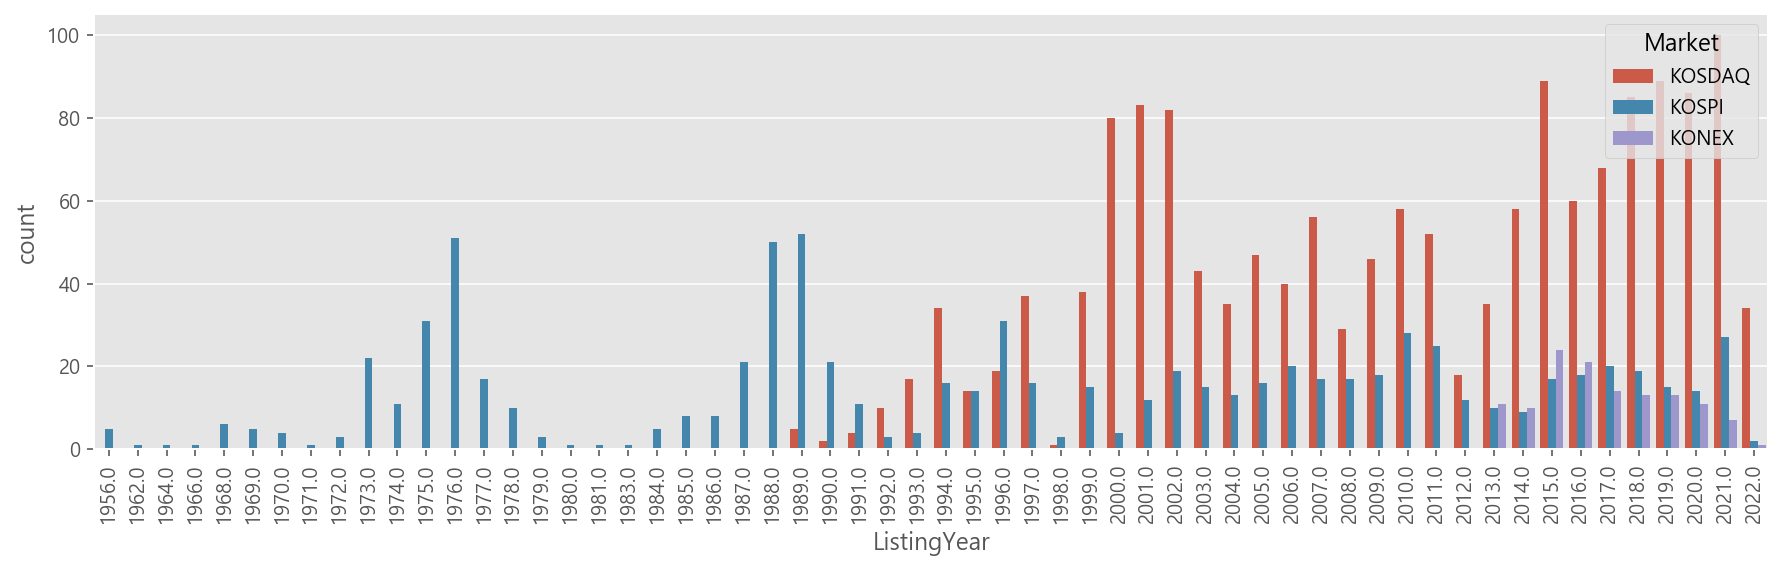

In [125]:
# Seaborn countplot 활용하여 빈도수를 표현합니다.
# hue 를 사용해 다른 변수를 함께 표현합니다. hue는 색상을 의미합니다.
plt.figure(figsize=(15, 4))
plt.xticks(rotation=90)
sns.countplot(data=df, x="ListingYear", hue="Market")

### Pandas를 통한 시각화

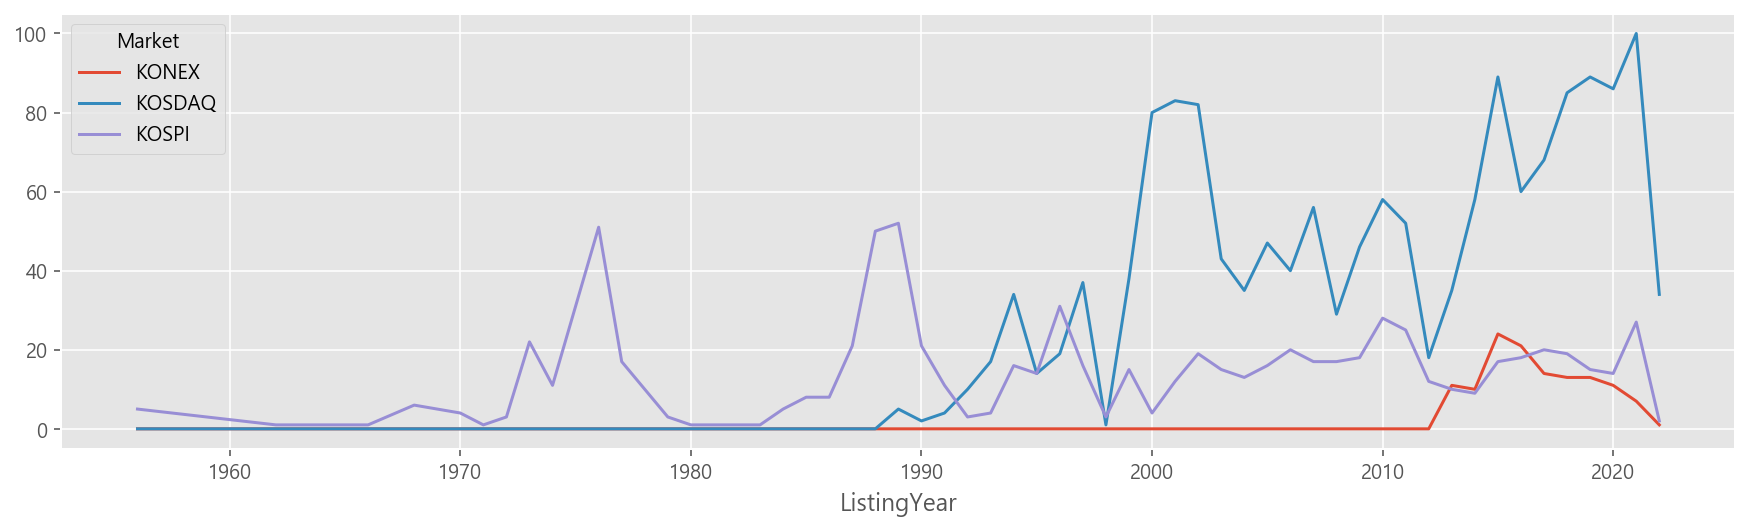

In [131]:
# Pandas plot 기능 활용하여 기본 그래프(line)를 그립니다.
# Pandas plot으로 그릴 때 x축에 인덱스 값이 y축에는 컬럼에 있는 값이 들어갑니다.
# 컬럼이 여러개라면 다른 색상으로 그려집니다.
df_market_year.T.plot(figsize=(15, 4))

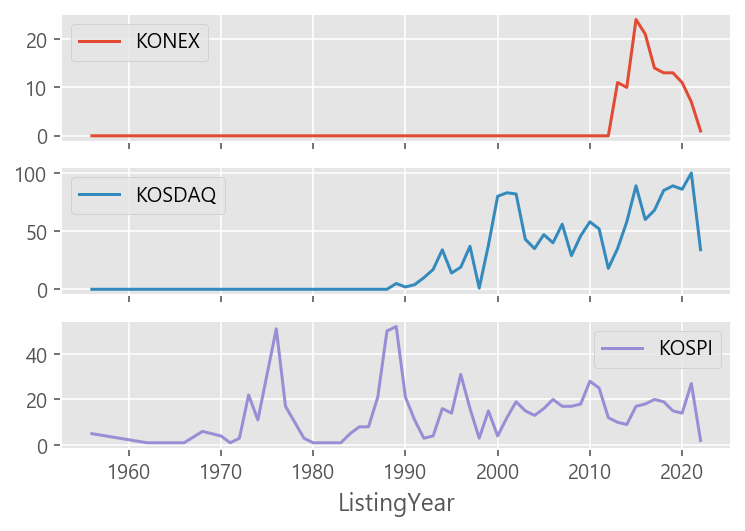

In [132]:
# 컬럼값을 subplots 으로 그립니다.
g = df_market_year.T.plot(subplots=True)

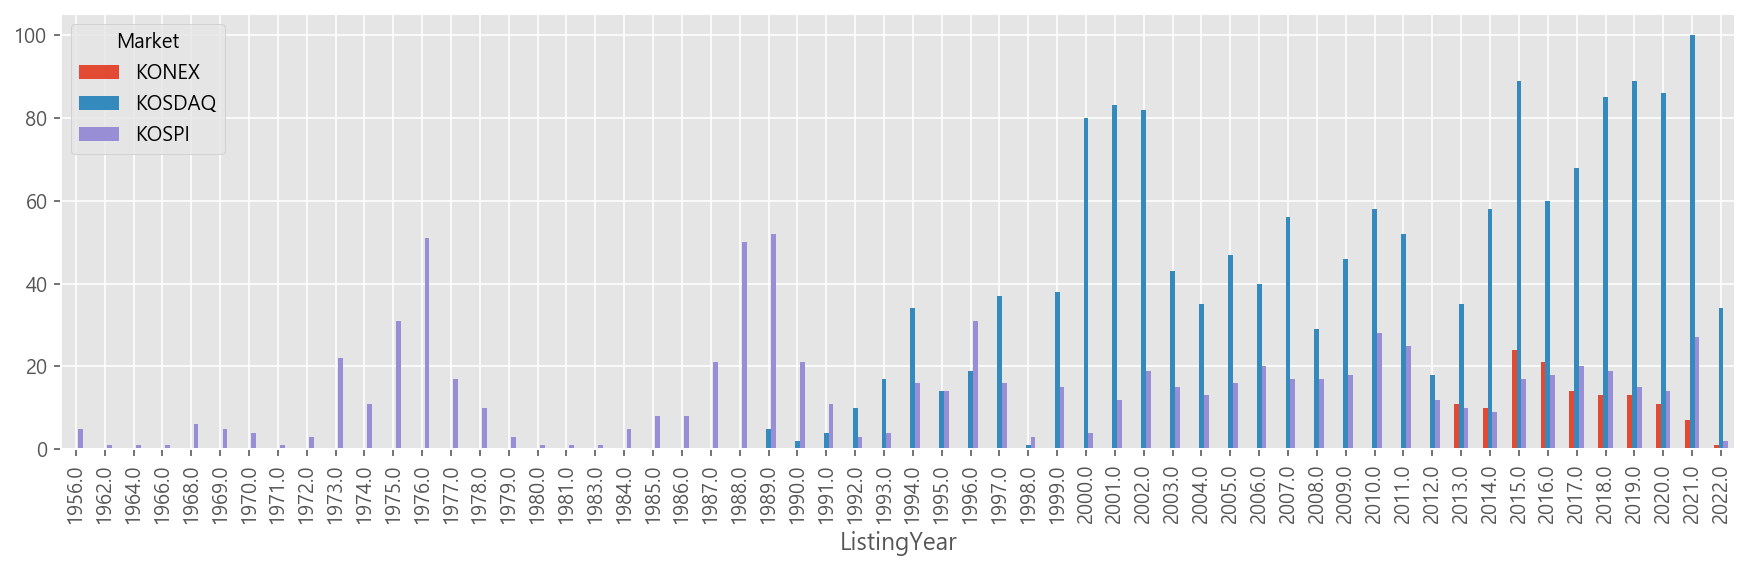

In [134]:
s

In [139]:
df_market_year.index

Index(['KONEX', 'KOSDAQ', 'KOSPI'], dtype='object', name='Market')

In [138]:
# 컬럼명의 데이터 타입을 int 형태로 변경합니다.
# market_year.columns
# dir(df_market_year.columns)
df_market_year.columns = df_market_year.columns.astype(int)
df_market_year.columns

Int64Index([1956, 1962, 1964, 1966, 1968, 1969, 1970, 1971, 1972, 1973, 1974,
            1975, 1976, 1977, 1978, 1979, 1980, 1981, 1983, 1984, 1985, 1986,
            1987, 1988, 1989, 1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997,
            1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008,
            2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019,
            2020, 2021, 2022],
           dtype='int64', name='ListingYear')

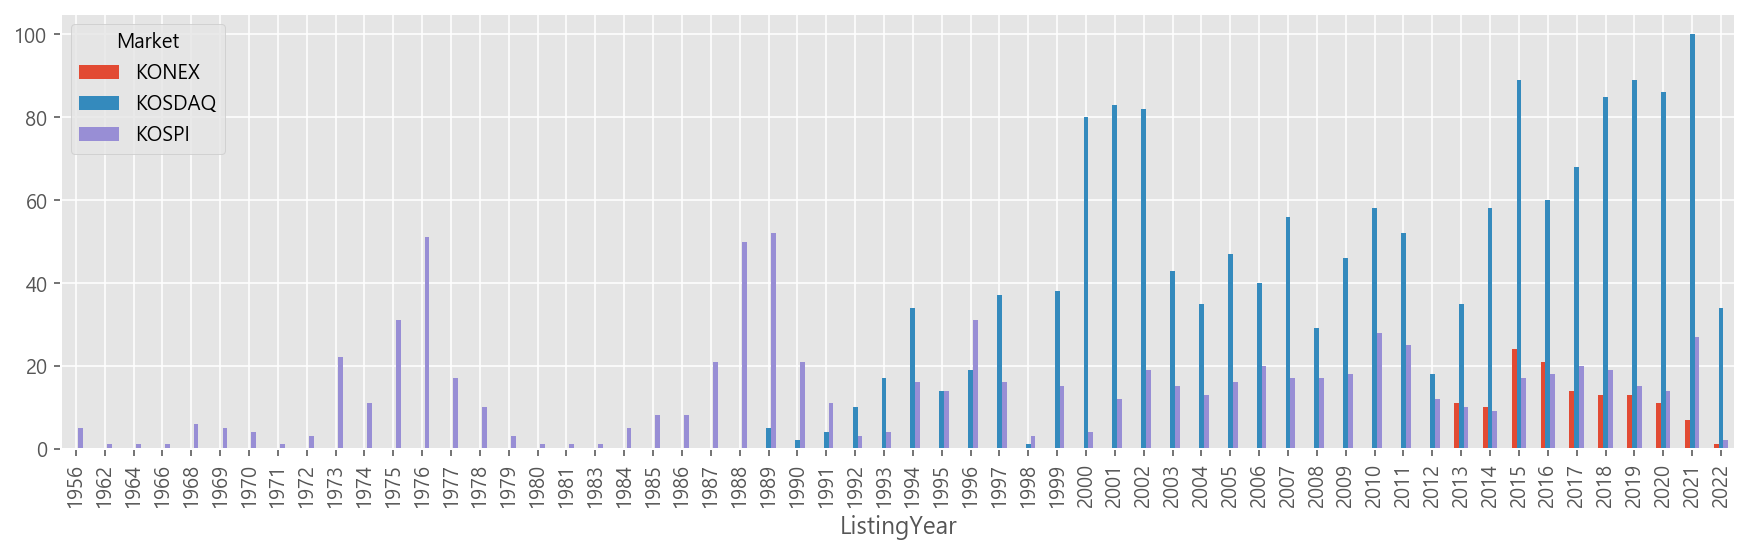

In [145]:
# 막대(bar)그래프 그리기
# market_year
g = df_market_year.T.plot.bar(figsize=(15, 4))

### groupby 와 pivot_table로 빈도수 구하기
<img src="https://pandas.pydata.org/pandas-docs/stable/_images/06_valuecounts.svg">

* [How to calculate summary statistics? — pandas documentation](https://pandas.pydata.org/pandas-docs/stable/getting_started/intro_tutorials/06_calculate_statistics.html)
* [Group by: split-apply-combine — pandas documentation](https://pandas.pydata.org/pandas-docs/stable/user_guide/groupby.html)
* [pandas.pivot_table — pandas 1.2.0 documentation](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.pivot_table.html)

In [ ]:
# groupby([인덱스 컬럼 리스트])[연산에 사용할 컬럼].연산()
# market_year

In [ ]:
# pivot_table로 같은 결과가 나오게 연산하기


In [ ]:
# 위의 groupby 결과를 scatterplot으로 그립니다.
# df_market_year


In [ ]:
# lineplot 그리기


In [ ]:
# relplot으로 subplot 그리기 - scatter


In [ ]:
# relplot으로 subplot 그리기 - line


### 구간화 binnig 과 히스토그램
* 연속된 수치 데이터를 범주형 데이터로 표현, bucketing 이라고 부르기도 함
* 히스토그램 : 도수분포를 그래프 형태로 표현한 것
* 막대그래프와 비슷해 보이지만 다른 그래프
* 참고 : [히스토그램 - 위키백과, 우리 모두의 백과사전](https://ko.wikipedia.org/wiki/%ED%9E%88%EC%8A%A4%ED%86%A0%EA%B7%B8%EB%9E%A8)

In [ ]:
# bins 의 갯수에 따라 그래프의 표현 방법이 달라집니다.


## 데이터 색인

In [ ]:
# 케이맨 제도에 있는 회사 찾기


In [ ]:
# 1970년 이전에 상장한 기업을 찾습니다.


In [ ]:
# and => &
# or  => |
True and True

In [ ]:
# 2020년 상장한 서울특별시에 소재한 코스피 종목을 찾습니다.


### 지역별 섹터

In [ ]:
# Sector, Region 으로 crosstab 연산을 합니다.
# df_sr


### 컬럼과 인덱스 값으로 색인하기

In [ ]:
# 특정 컬럼만 가져오기


### 특정 행만 가져오기

* .loc[행]
* .loc[행, 열]
* .loc[조건식, 열]

In [ ]:
# df_sr에서 "소프트웨어 개발 및 공급업" 행만 가져오기


In [ ]:
# loc 로 행인덱스 가져오기
# 행에서 "소프트웨어 개발 및 공급업", "금융 지원 서비스업", "의약품 제조업" 가져오기


In [ ]:
# loc 로 행, 컬럼 가져오기
# 행에서 "소프트웨어 개발 및 공급업", "금융 지원 서비스업", "의약품 제조업"
# 열에서 "서울특별시" 가져오기



In [ ]:
# loc로 여러 행과 열 가져오기


In [ ]:
# "소프트웨어 개발 및 공급업" 만 가져와서 막대그래프를 그립니다.


In [ ]:
# "의약품 제조업" 만 가져와서 막대그래프를 그립니다.



In [ ]:
# iloc[행]
# iloc[행,열]


In [ ]:
# df.head 혹은 tail도 내부에서 iloc를 슬라이싱으로 사용하고 있습니다.
# df.head??

In [ ]:
# df_sr.tail??